In [1]:
import pandas as pd 
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

In [2]:
!pip install openpyxl

In [5]:
df=pd.read_excel("C:\\Users\\parth\\Downloads\\Private_Equity.xlsx")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   guid         100 non-null    object
 1   image        71 non-null     object
 2   link         100 non-null    object
 3   loadedUrl    98 non-null     object
 4   publishedAt  100 non-null    object
 5   rssLink      100 non-null    object
 6   source       100 non-null    object
 7   sourceUrl    100 non-null    object
 8   title        100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [9]:
df['lowercase_text'] = df['title'].str.lower()

In [10]:
df.head()

,guid,image,link,loadedUrl,publishedAt,rssLink,source,sourceUrl,title,lowercase_text
0,CBMingFBVV95cUxNblVnVzd3N1ZmX3JWUkNrampVMFdBRD...,https://static.dw.com/image/74001343_6.jpg,https://www.dw.com/en/germany-state-election-r...,https://www.dw.com/en/germany-state-election-r...,2025-09-15T13:22:30.000Z,https://news.google.com/rss/articles/CBMingFBV...,DW,https://www.dw.com,"Germany state elections: AfD makes gains, Gree...","germany state elections: afd makes gains, gree..."
1,CBMiuAFBVV95cUxQUGRwM3BtMzdoV0dqTU9telpUYWx0Tz...,https://i.abcnewsfe.com/a/eaa174fd-c770-4d9a-8...,https://abcnews.go.com/International/wireStory...,https://abcnews.go.com/International/wireStory...,2025-09-15T12:22:30.000Z,https://news.google.com/rss/articles/CBMiuAFBV...,ABC News,https://abcnews.go.com,British politicians condemn Elon Musk's commen...,british politicians condemn elon musk's commen...
2,CBMiWkFVX3lxTFB6QlBwM1pXbjZpa0F2aDdmdEFRX2h0M0...,https://ichef.bbci.co.uk/news/1024/branded_new...,https://www.bbc.com/news/articles/cm2zye8745do,https://www.bbc.com/news/articles/cm2zye8745do,2025-09-15T15:32:30.000Z,https://news.google.com/rss/articles/CBMiWkFVX...,BBC,https://www.bbc.com,Trump renews push to end companies' quarterly ...,trump renews push to end companies' quarterly ...
3,CBMirgFBVV95cUxObllLUG45dk1xRkZDMG53TGcxeC1obk...,https://www.aljazeera.com/wp-content/uploads/2...,https://www.aljazeera.com/news/2025/9/15/can-t...,https://www.aljazeera.com/news/2025/9/15/can-t...,2025-09-15T14:44:57.000Z,https://news.google.com/rss/articles/CBMirgFBV...,Al Jazeera,https://www.aljazeera.com,Can the EU and NATO impose tariffs on India an...,can the eu and nato impose tariffs on india an...
4,CBMiigFBVV95cUxNS04ybnFQeWc0ZWtxSV9PYjRFOUl5VW...,https://www.washingtonpost.com/wp-apps/imrs.ph...,https://www.washingtonpost.com/world/2025/09/1...,https://www.washingtonpost.com/world/2025/09/1...,2025-09-15T17:45:15.000Z,https://news.google.com/rss/articles/CBMiigFBV...,The Washington Post,https://www.washingtonpost.com,Poland calls for NATO-backed no-fly zone over ...,poland calls for nato-backed no-fly zone over ...


In [12]:
df['no_special_chars'] = df['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df['tokenized_text'] = df['no_special_chars'].apply(word_tokenize)

In [13]:
stop_words = set(stopwords.words('english'))
df['text_cleaned'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [14]:
df.to_excel("Private_Equity_PP.xlsx", index=False)

In [15]:
from textblob import TextBlob
import ast

In [16]:
PE_PROCESSED = pd.read_excel("Private_Equity_PP.xlsx")

In [17]:
PE_PROCESSED.head()

,guid,image,link,loadedUrl,publishedAt,rssLink,source,sourceUrl,title,lowercase_text,no_special_chars,tokenized_text,text_cleaned
0,CBMingFBVV95cUxNblVnVzd3N1ZmX3JWUkNrampVMFdBRD...,https://static.dw.com/image/74001343_6.jpg,https://www.dw.com/en/germany-state-election-r...,https://www.dw.com/en/germany-state-election-r...,2025-09-15T13:22:30.000Z,https://news.google.com/rss/articles/CBMingFBV...,DW,https://www.dw.com,"Germany state elections: AfD makes gains, Gree...","germany state elections: afd makes gains, gree...",germany state elections afd makes gains greens...,"['germany', 'state', 'elections', 'afd', 'make...","['germany', 'state', 'elections', 'afd', 'make..."
1,CBMiuAFBVV95cUxQUGRwM3BtMzdoV0dqTU9telpUYWx0Tz...,https://i.abcnewsfe.com/a/eaa174fd-c770-4d9a-8...,https://abcnews.go.com/International/wireStory...,https://abcnews.go.com/International/wireStory...,2025-09-15T12:22:30.000Z,https://news.google.com/rss/articles/CBMiuAFBV...,ABC News,https://abcnews.go.com,British politicians condemn Elon Musk's commen...,british politicians condemn elon musk's commen...,british politicians condemn elon musks comment...,"['british', 'politicians', 'condemn', 'elon', ...","['british', 'politicians', 'condemn', 'elon', ..."
2,CBMiWkFVX3lxTFB6QlBwM1pXbjZpa0F2aDdmdEFRX2h0M0...,https://ichef.bbci.co.uk/news/1024/branded_new...,https://www.bbc.com/news/articles/cm2zye8745do,https://www.bbc.com/news/articles/cm2zye8745do,2025-09-15T15:32:30.000Z,https://news.google.com/rss/articles/CBMiWkFVX...,BBC,https://www.bbc.com,Trump renews push to end companies' quarterly ...,trump renews push to end companies' quarterly ...,trump renews push to end companies quarterly r...,"['trump', 'renews', 'push', 'to', 'end', 'comp...","['trump', 'renews', 'push', 'end', 'companies'..."
3,CBMirgFBVV95cUxObllLUG45dk1xRkZDMG53TGcxeC1obk...,https://www.aljazeera.com/wp-content/uploads/2...,https://www.aljazeera.com/news/2025/9/15/can-t...,https://www.aljazeera.com/news/2025/9/15/can-t...,2025-09-15T14:44:57.000Z,https://news.google.com/rss/articles/CBMirgFBV...,Al Jazeera,https://www.aljazeera.com,Can the EU and NATO impose tariffs on India an...,can the eu and nato impose tariffs on india an...,can the eu and nato impose tariffs on india an...,"['can', 'the', 'eu', 'and', 'nato', 'impose', ...","['eu', 'nato', 'impose', 'tariffs', 'india', '..."
4,CBMiigFBVV95cUxNS04ybnFQeWc0ZWtxSV9PYjRFOUl5VW...,https://www.washingtonpost.com/wp-apps/imrs.ph...,https://www.washingtonpost.com/world/2025/09/1...,https://www.washingtonpost.com/world/2025/09/1...,2025-09-15T17:45:15.000Z,https://news.google.com/rss/articles/CBMiigFBV...,The Washington Post,https://www.washingtonpost.com,Poland calls for NATO-backed no-fly zone over ...,poland calls for nato-backed no-fly zone over ...,poland calls for natobacked nofly zone over uk...,"['poland', 'calls', 'for', 'natobacked', 'nofl...","['poland', 'calls', 'natobacked', 'nofly', 'zo..."


In [18]:
def join_cleaned_text(row):
    try:
        cleaned_list = ast.literal_eval(row)
        return ' '.join(cleaned_list)
    except (ValueError, SyntaxError, TypeError):
        if isinstance(row, list):
            return ' '.join(row)
        return "" 

In [19]:
PE_PROCESSED['text_cleaned_joined'] = PE_PROCESSED['text_cleaned'].apply(join_cleaned_text)

In [21]:
def get_sentiment_score(title):
     return TextBlob(title).sentiment.polarity

In [22]:
PE_PROCESSED['sentiment_score'] = PE_PROCESSED['text_cleaned_joined'].apply(get_sentiment_score)

In [23]:
PE_PROCESSED.head()

,guid,image,link,loadedUrl,publishedAt,rssLink,source,sourceUrl,title,lowercase_text,no_special_chars,tokenized_text,text_cleaned,text_cleaned_joined,sentiment_score
0,CBMingFBVV95cUxNblVnVzd3N1ZmX3JWUkNrampVMFdBRD...,https://static.dw.com/image/74001343_6.jpg,https://www.dw.com/en/germany-state-election-r...,https://www.dw.com/en/germany-state-election-r...,2025-09-15T13:22:30.000Z,https://news.google.com/rss/articles/CBMingFBV...,DW,https://www.dw.com,"Germany state elections: AfD makes gains, Gree...","germany state elections: afd makes gains, gree...",germany state elections afd makes gains greens...,"['germany', 'state', 'elections', 'afd', 'make...","['germany', 'state', 'elections', 'afd', 'make...",germany state elections afd makes gains greens...,-0.4
1,CBMiuAFBVV95cUxQUGRwM3BtMzdoV0dqTU9telpUYWx0Tz...,https://i.abcnewsfe.com/a/eaa174fd-c770-4d9a-8...,https://abcnews.go.com/International/wireStory...,https://abcnews.go.com/International/wireStory...,2025-09-15T12:22:30.000Z,https://news.google.com/rss/articles/CBMiuAFBV...,ABC News,https://abcnews.go.com,British politicians condemn Elon Musk's commen...,british politicians condemn elon musk's commen...,british politicians condemn elon musks comment...,"['british', 'politicians', 'condemn', 'elon', ...","['british', 'politicians', 'condemn', 'elon', ...",british politicians condemn elon musks comment...,0.0
2,CBMiWkFVX3lxTFB6QlBwM1pXbjZpa0F2aDdmdEFRX2h0M0...,https://ichef.bbci.co.uk/news/1024/branded_new...,https://www.bbc.com/news/articles/cm2zye8745do,https://www.bbc.com/news/articles/cm2zye8745do,2025-09-15T15:32:30.000Z,https://news.google.com/rss/articles/CBMiWkFVX...,BBC,https://www.bbc.com,Trump renews push to end companies' quarterly ...,trump renews push to end companies' quarterly ...,trump renews push to end companies quarterly r...,"['trump', 'renews', 'push', 'to', 'end', 'comp...","['trump', 'renews', 'push', 'end', 'companies'...",trump renews push end companies quarterly reports,0.0
3,CBMirgFBVV95cUxObllLUG45dk1xRkZDMG53TGcxeC1obk...,https://www.aljazeera.com/wp-content/uploads/2...,https://www.aljazeera.com/news/2025/9/15/can-t...,https://www.aljazeera.com/news/2025/9/15/can-t...,2025-09-15T14:44:57.000Z,https://news.google.com/rss/articles/CBMirgFBV...,Al Jazeera,https://www.aljazeera.com,Can the EU and NATO impose tariffs on India an...,can the eu and nato impose tariffs on india an...,can the eu and nato impose tariffs on india an...,"['can', 'the', 'eu', 'and', 'nato', 'impose', ...","['eu', 'nato', 'impose', 'tariffs', 'india', '...",eu nato impose tariffs india china trump wants,0.2
4,CBMiigFBVV95cUxNS04ybnFQeWc0ZWtxSV9PYjRFOUl5VW...,https://www.washingtonpost.com/wp-apps/imrs.ph...,https://www.washingtonpost.com/world/2025/09/1...,https://www.washingtonpost.com/world/2025/09/1...,2025-09-15T17:45:15.000Z,https://news.google.com/rss/articles/CBMiigFBV...,The Washington Post,https://www.washingtonpost.com,Poland calls for NATO-backed no-fly zone over ...,poland calls for nato-backed no-fly zone over ...,poland calls for natobacked nofly zone over uk...,"['poland', 'calls', 'for', 'natobacked', 'nofl...","['poland', 'calls', 'natobacked', 'nofly', 'zo...",poland calls natobacked nofly zone ukraine,0.0


In [24]:
def get_sentiment_category(score):
    
     if score > 0:
        return 'Positive'
     elif score == 0:
        return 'Neutral'
     else:
        return 'Negative'

In [25]:
PE_PROCESSED['sentiment_category'] = PE_PROCESSED['sentiment_score'].apply(get_sentiment_category)

In [26]:
PE_PROCESSED.head()

,guid,image,link,loadedUrl,publishedAt,rssLink,source,sourceUrl,title,lowercase_text,no_special_chars,tokenized_text,text_cleaned,text_cleaned_joined,sentiment_score,sentiment_category
0,CBMingFBVV95cUxNblVnVzd3N1ZmX3JWUkNrampVMFdBRD...,https://static.dw.com/image/74001343_6.jpg,https://www.dw.com/en/germany-state-election-r...,https://www.dw.com/en/germany-state-election-r...,2025-09-15T13:22:30.000Z,https://news.google.com/rss/articles/CBMingFBV...,DW,https://www.dw.com,"Germany state elections: AfD makes gains, Gree...","germany state elections: afd makes gains, gree...",germany state elections afd makes gains greens...,"['germany', 'state', 'elections', 'afd', 'make...","['germany', 'state', 'elections', 'afd', 'make...",germany state elections afd makes gains greens...,-0.4,Negative
1,CBMiuAFBVV95cUxQUGRwM3BtMzdoV0dqTU9telpUYWx0Tz...,https://i.abcnewsfe.com/a/eaa174fd-c770-4d9a-8...,https://abcnews.go.com/International/wireStory...,https://abcnews.go.com/International/wireStory...,2025-09-15T12:22:30.000Z,https://news.google.com/rss/articles/CBMiuAFBV...,ABC News,https://abcnews.go.com,British politicians condemn Elon Musk's commen...,british politicians condemn elon musk's commen...,british politicians condemn elon musks comment...,"['british', 'politicians', 'condemn', 'elon', ...","['british', 'politicians', 'condemn', 'elon', ...",british politicians condemn elon musks comment...,0.0,Neutral
2,CBMiWkFVX3lxTFB6QlBwM1pXbjZpa0F2aDdmdEFRX2h0M0...,https://ichef.bbci.co.uk/news/1024/branded_new...,https://www.bbc.com/news/articles/cm2zye8745do,https://www.bbc.com/news/articles/cm2zye8745do,2025-09-15T15:32:30.000Z,https://news.google.com/rss/articles/CBMiWkFVX...,BBC,https://www.bbc.com,Trump renews push to end companies' quarterly ...,trump renews push to end companies' quarterly ...,trump renews push to end companies quarterly r...,"['trump', 'renews', 'push', 'to', 'end', 'comp...","['trump', 'renews', 'push', 'end', 'companies'...",trump renews push end companies quarterly reports,0.0,Neutral
3,CBMirgFBVV95cUxObllLUG45dk1xRkZDMG53TGcxeC1obk...,https://www.aljazeera.com/wp-content/uploads/2...,https://www.aljazeera.com/news/2025/9/15/can-t...,https://www.aljazeera.com/news/2025/9/15/can-t...,2025-09-15T14:44:57.000Z,https://news.google.com/rss/articles/CBMirgFBV...,Al Jazeera,https://www.aljazeera.com,Can the EU and NATO impose tariffs on India an...,can the eu and nato impose tariffs on india an...,can the eu and nato impose tariffs on india an...,"['can', 'the', 'eu', 'and', 'nato', 'impose', ...","['eu', 'nato', 'impose', 'tariffs', 'india', '...",eu nato impose tariffs india china trump wants,0.2,Positive
4,CBMiigFBVV95cUxNS04ybnFQeWc0ZWtxSV9PYjRFOUl5VW...,https://www.washingtonpost.com/wp-apps/imrs.ph...,https://www.washingtonpost.com/world/2025/09/1...,https://www.washingtonpost.com/world/2025/09/1...,2025-09-15T17:45:15.000Z,https://news.google.com/rss/articles/CBMiigFBV...,The Washington Post,https://www.washingtonpost.com,Poland calls for NATO-backed no-fly zone over ...,poland calls for nato-backed no-fly zone over ...,poland calls for natobacked nofly zone over uk...,"['poland', 'calls', 'for', 'natobacked', 'nofl...","['poland', 'calls', 'natobacked', 'nofly', 'zo...",poland calls natobacked nofly zone ukraine,0.0,Neutral


In [28]:
print(PE_PROCESSED[['title', 'sentiment_score', 'sentiment_category']].head().to_string())

                                                                    title  sentiment_score sentiment_category
0            Germany state elections: AfD makes gains, Greens fall behind             -0.4           Negative
1  British politicians condemn Elon Musk's comments at anti-migrant rally              0.0            Neutral
2                   Trump renews push to end companies' quarterly reports              0.0            Neutral
3  Can the EU and NATO impose tariffs on India and China, as Trump wants?              0.2           Positive
4                   Poland calls for NATO-backed no-fly zone over Ukraine              0.0            Neutral


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
SENTIMENT_COUNTS = PE_PROCESSED['sentiment_category'].value_counts()

([<matplotlib.patches.Wedge at 0x1b49bd7ef90>,
 [Text(-0.47529407190402756, -0.9920158996774645, 'Neutral'),
  Text(0.8524389906370998, 0.6952321678702753, 'Positive'),
  Text(-0.4613972749495715, 0.9985552336596658, 'Negative')],
 [Text(-0.2592513119476514, -0.5410995816422532, '58.0%'),
  Text(0.46496672216569074, 0.37921754611105923, '28.0%'),
  Text(-0.25167124088158443, 0.5446664910870904, '14.0%')])

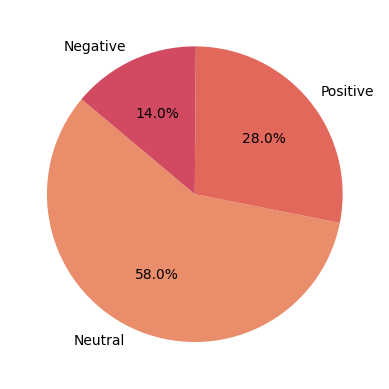

In [31]:
plt.pie(SENTIMENT_COUNTS,
        labels=SENTIMENT_COUNTS.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=sns.color_palette('flare'))

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Vectorizing the text data using TF-IDF.
# We'll ignore terms that appear in more than 95% of the documents and less than 2 documents.
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(PE_PROCESSED['title'])

# 2. Applying NMF
# We specify 5 topics.
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# 3. Display the topics with their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, num_top_words)

# 4. Assigning the dominant topic to each document in the DataFrame
topic_results = nmf_model.transform(tfidf)
PE_PROCESSED['topic'] = topic_results.argmax(axis=1) + 1  # Adding 1 to make topics 1-5 instead of 0-4

print("\nDataFrame with assigned topics:")
print(PE_PROCESSED[['title', 'topic']].head())

Topic 1:
private equity fund key energy boston home price sale grows
Topic 2:
china says tariffs economy cash tesla case sea south wants
Topic 3:
year sale defense investments end price australia workers sign grows
Topic 4:
trump war russia end military qatar nato says netanyahu push
Topic 5:
new ai future capital adds robinhood venture save fund push

DataFrame with assigned topics:
                                               title  topic
0  Germany state elections: AfD makes gains, Gree...      5
1  British politicians condemn Elon Musk's commen...      5
2  Trump renews push to end companies' quarterly ...      4
3  Can the EU and NATO impose tariffs on India an...      2
4  Poland calls for NATO-backed no-fly zone over ...      4


C:\Users\parth\AppData\Local\Temp\ipykernel_17900\1905131574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='crest')


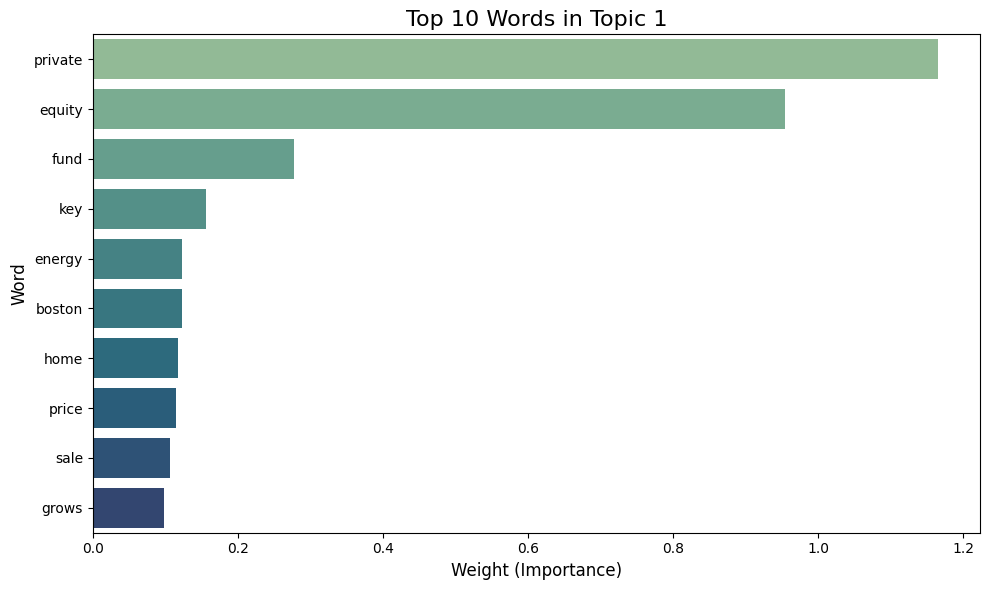

C:\Users\parth\AppData\Local\Temp\ipykernel_17900\1905131574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='crest')


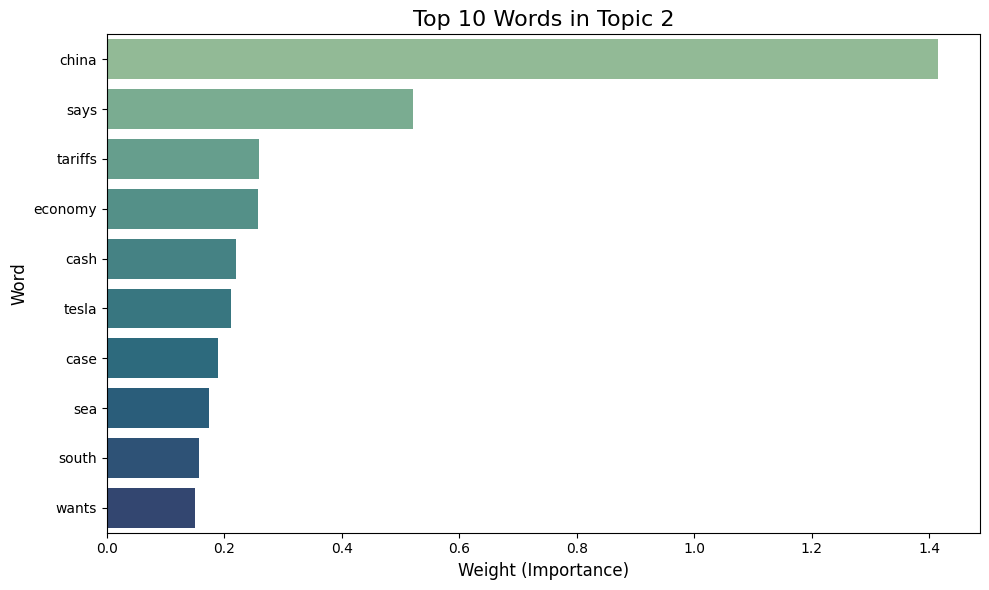

C:\Users\parth\AppData\Local\Temp\ipykernel_17900\1905131574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='crest')


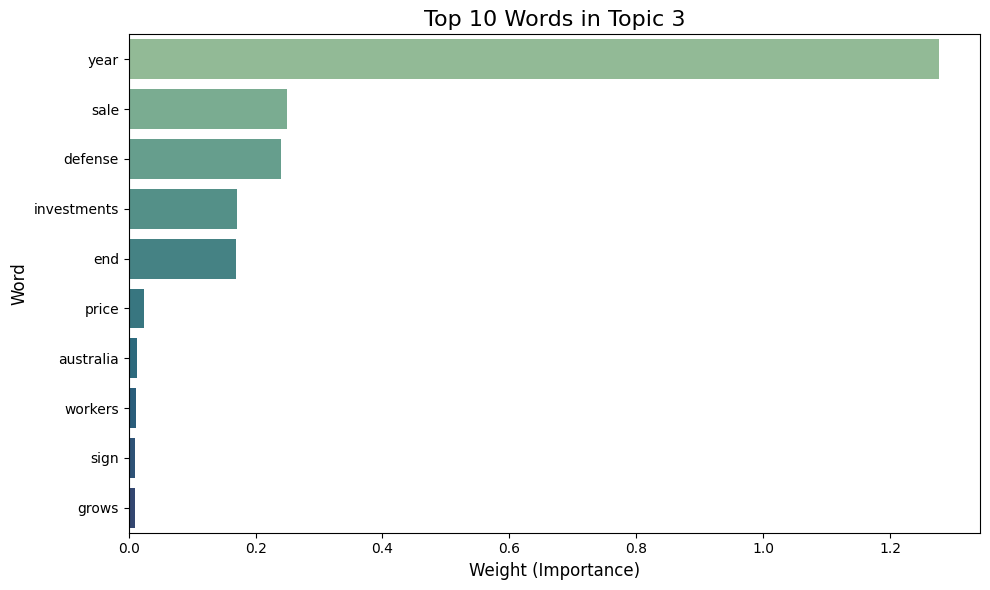

C:\Users\parth\AppData\Local\Temp\ipykernel_17900\1905131574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='crest')


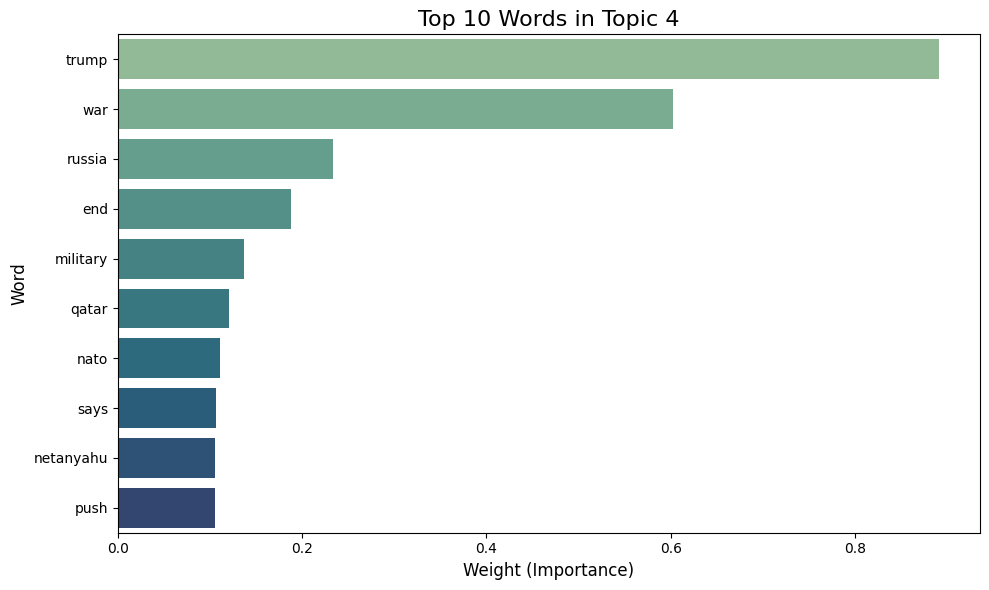

C:\Users\parth\AppData\Local\Temp\ipykernel_17900\1905131574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='crest')


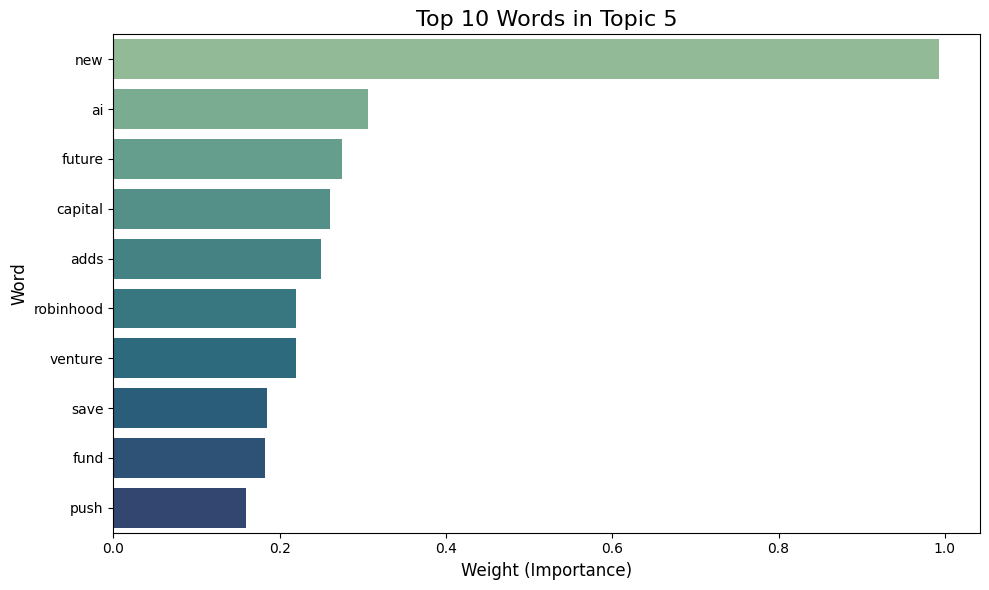

In [34]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# Loop through each topic and create a bar chart for its top words
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a DataFrame for the top words in the current topic
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]

    topic_df = pd.DataFrame({'word': top_words, 'weight': top_weights})

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='weight', y='word', data=topic_df, palette='crest')
    plt.title(f'Top {num_top_words} Words in Topic {topic_idx + 1}', fontsize=16)
    plt.xlabel('Weight (Importance)', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.tight_layout()
    plt.show()

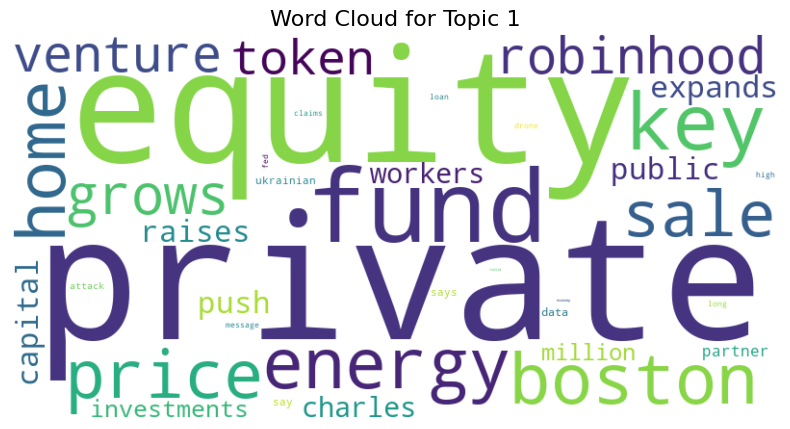

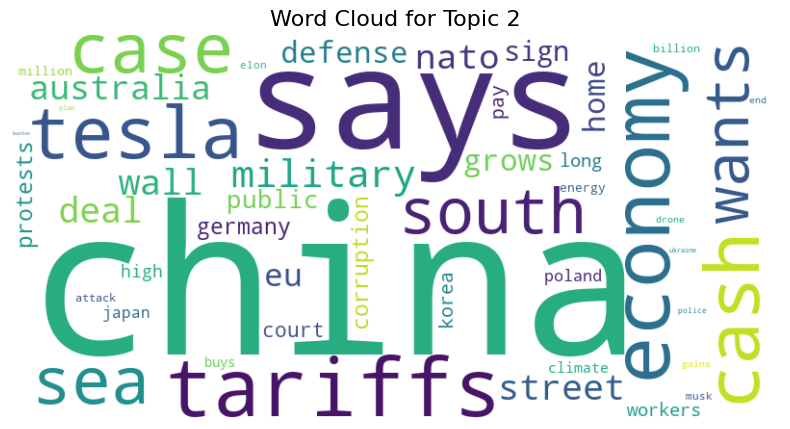

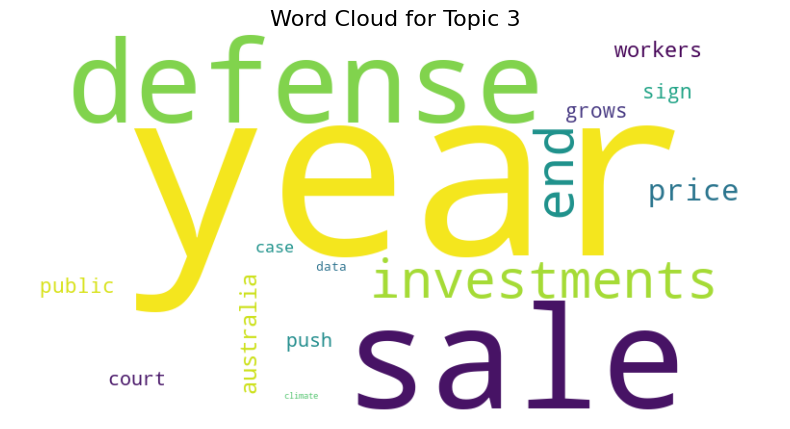

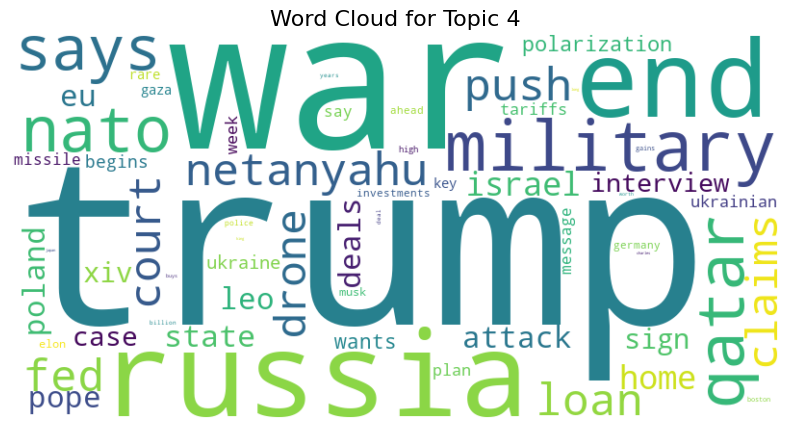

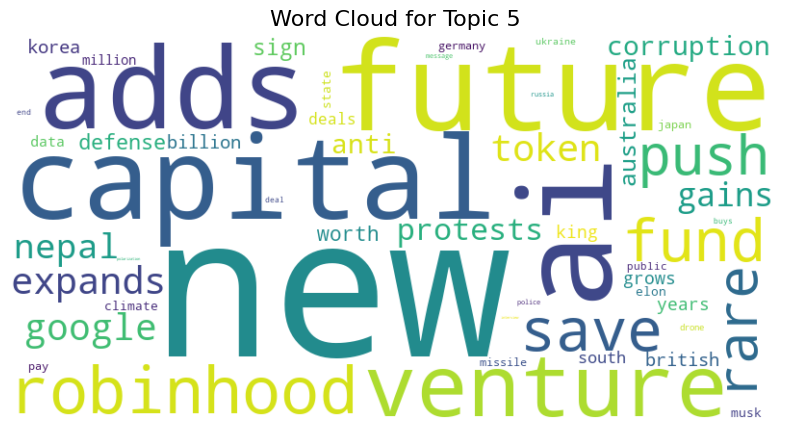

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic and create a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_idx + 1}', fontsize=16)
    plt.axis('off')
    plt.show()